## Project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1 - Ocean Flow

#### Problem 1.a


In [28]:
# Time steps in the simulation
n_steps = 100

# Speed flow: 3D array with shape (Time, X coordinates, Y coordinates, 2)
speed_flow = []

# Load the X and Y data for each time step
for i in range(n_steps):

    # Load the data for X and Y
    # The data is given in a matrix with data for each position in the grid
    Vx = pd.read_csv(f'./OceanFlow/{i+1}u.csv', header=None).values
    Vy = pd.read_csv(f'./OceanFlow/{i+1}v.csv', header=None).values

    # Construct the total velocity by concatenating the X and Y components as
    # columns in a single array
    V = np.stack([Vx, Vy], axis=2)

    # Add the current time step velocity to the speed_flow array
    speed_flow.append(V)

# Convert the speed_flow list to a numpy array
Vt = np.array(speed_flow)
print(Vt.shape)

(100, 504, 555, 2)


Provide the coordinates (in Kilometers) of the point with smallest variation in speed flow (magnitude of the vector). Hint: Recall that technically the speed flow inland is zero.

You should first calculate the magnitude for each data point, $\sqrt{u^2+v^2}$, then compute the variance across time. Some things to look out for:

Some elements do not have meaningful data (all zeros, generally land and the border of the map). Remove any locations with a variance of zero before finding the minimum.

The answer is in kilometers, as specified above, the zero-indexed element (0, 0) corresponds to (0 km, 0 km). The grid spacing is 3 km. Multiply your zero-indexed indices by 3 to get the location in kilometers.

Libraries such as pandas will load these .csv files with the first index over rows, and the second index over columns. If you want $x=6$ km and $y=3$ km and you index such an array as array[2, 1] you will get the wrong result. Double check the ordering of indices and ensure they correspond to the definition of the $x$ and $y$ axes.


Location with lowest variance: (170, 121)
Location with lowest variance: (510km, 363km)
Variance at that location: 1.2297629738694259e-13


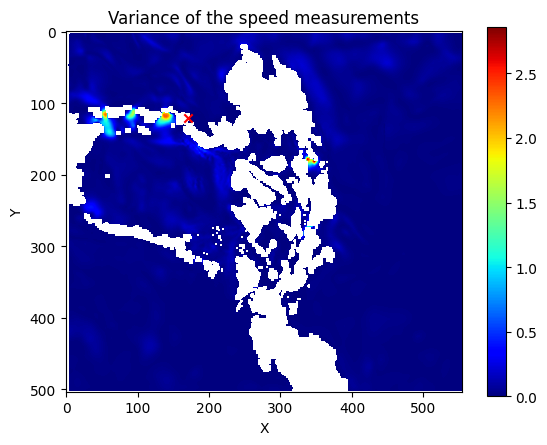

In [44]:
# Extract the X and Y velocities
Vx = Vt[:, :, :, 0]
Vy = Vt[:, :, :, 1]

# Calculate the magnitude of the velocity (speed)
speed = np.sqrt(Vx**2 + Vy**2)

# Calculate the variance of the speed measurements across all time steps
speed_var = np.nanvar(speed, axis=0)

# Remove values with variance of zero
speed_var[speed_var == 0] = np.nan

# Get the coordinates of the grid with the lowest variance
# Note:
# - np.nanargmin returns the index of the minimum value in a flattened array.
#   We use np.unravel_index to convert this index to the 2D coordinates of the
#   grid given its shape.
# - The coordinates are given in (y, x) order because columns provide X coordinates
#   and rows provide Y coordinates.
min_y, min_x = np.unravel_index(
    np.nanargmin(speed_var),
    speed_var.shape
)

# According to the instructions, the answer in kilometers can be obtained by taking
# the zero-indexed coordinate and multiplying it by 3.
min_y_km = min_y * 3
min_x_km = min_x * 3
print(f"Location with lowest variance: ({min_x}, {min_y})")
print(f"Location with lowest variance: ({min_x_km}km, {min_y_km}km)")
print(f"Variance at that location: {speed_var[min_y, min_x]}")

# ==================== PLOT ==================== #

# Plot the variance of the speed measurements
plt.imshow(speed_var, cmap='jet')
plt.colorbar()
plt.title('Variance of the speed measurements')
plt.xlabel('X')
plt.ylabel('Y')

# Add an indicator for the location with the lowest variance
plt.scatter(min_x, min_y, marker='x', color='red')
plt.show()


#### Problem 1.b

Provide the coordinates (in Kilometers) and the time stamp (in hours), of the point where the flow has its maximum x-axis velocity (the maximum signed value).

Something to look out for:

- One answer is in hours, as specified above, the zero-indexed element 0 corresponds to 0 hrs. The time spacing is 3 hours. Multiply your zero-indexed time index by 3 to get the location in hours.


In [51]:
# Get the X axis velocity
Vx = Vt[:, :, :, 0]

# Get the maximum value X-axis value across all time steps
# Continue to keep in mind that the X and Y coordinates are reversed in the
# array shape (rows are Y coordinates and columns are X coordinates)
Vx_t_max, Vx_y_max, Vx_x_max = np.unravel_index(
    np.argmax(Vx),
    Vx.shape
)

# Multiply all max quantities by 3 to get the values in kilometers and hours
Vx_x_max_km = Vx_x_max * 3
Vx_y_max_km = Vx_y_max * 3
Vx_t_max_h = Vx_t_max * 3

print(f"Maximum X-axis velocity: {Vx[Vx_t_max, Vx_y_max, Vx_x_max]}")
print(f"Location of max X-axis velocity: ({Vx_x_max_km}km, {Vx_y_max_km}km)")
print(f"Time of max X-axis velocity: {Vx_t_max_h}h")


Maximum X-axis velocity: 5.7993
Location of max X-axis velocity: (1041km, 543km)
Time of max X-axis velocity: 84h


#### Problem 1.c

Take the average of the velocity vector over all time and positions, so that you get an overall average velocity for the entire data set.

Note you should average over land positions for this problem, do not attempt to remove them from the average. (You may want to consider in your own time how this might bias the result.)


In [53]:
# Get the X and Y axis velocities
Vx = Vt[:, :, :, 0]
Vy = Vt[:, :, :, 1]

# Calculate the average velocity for each component
Vx_avg = np.nanmean(Vx)
Vy_avg = np.nanmean(Vy)

print(f"Average X-axis velocity: {Vx_avg}")
print(f"Average Y-axis velocity: {Vy_avg}")

Average X-axis velocity: -0.09366228934616833
Average Y-axis velocity: -0.03548388738810676
